# 导入常用模块

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Plotly
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected = True)

#处理不平衡数据
from imblearn.over_sampling import SMOTE
from collections import Counter

#时间处理
import time

%matplotlib inline

path = open('E:/数据集/lending-club-loan-data/loan.csv',encoding='utf-8')
df = pd.read_csv(path)
df.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning:

Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

### distplot  统计分布

Text(0.5, 1.0, 'Total committed by Investors')

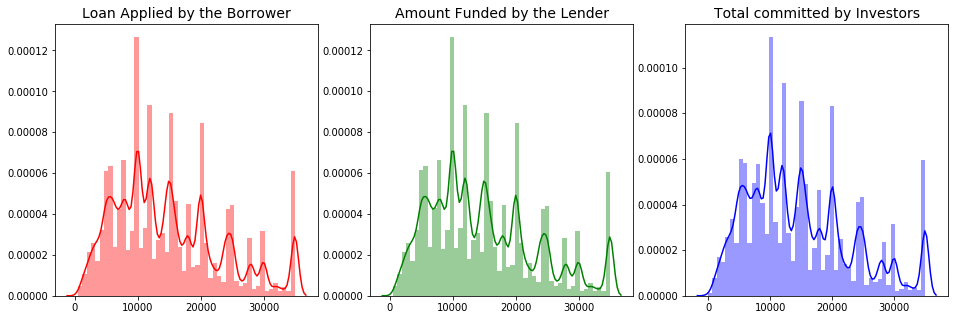

In [26]:
#借款量，借款发行量，总量有相同的分布？？？？？
plt.figure(figsize=(16,5))
plt.subplot(131)
sns.distplot(df['loan_amnt'].values,color = 'red')
plt.title("Loan Applied by the Borrower", fontsize=14)
plt.subplot(132)
sns.distplot(df['funded_amnt'].values,color='green')
plt.title("Amount Funded by the Lender", fontsize=14)
plt.subplot(133)
sns.distplot(df['funded_amnt_inv'].values,color='blue')
plt.title("Total committed by Investors", fontsize=14)

In [27]:
df['year'] = pd.to_datetime(df['issue_d']).dt.year

### barplot  条形图

Text(0, 0.5, 'Average loan amount issued')

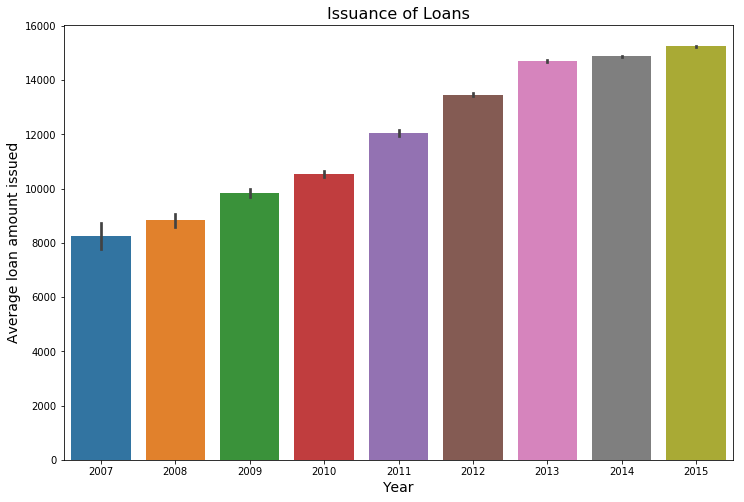

In [28]:
plt.figure(figsize = (12,8))
sns.barplot('year','loan_amnt',data = df )
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

In [29]:
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]

def loan_station(x):
    if x in bad_loan:
        return 'Bad Loan'
    else :
        return 'Good Loan'

In [30]:
df['loan_condition'] = df['loan_status'].apply(loan_station)

### pie chart 饼图    ，hue 分类条形图

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



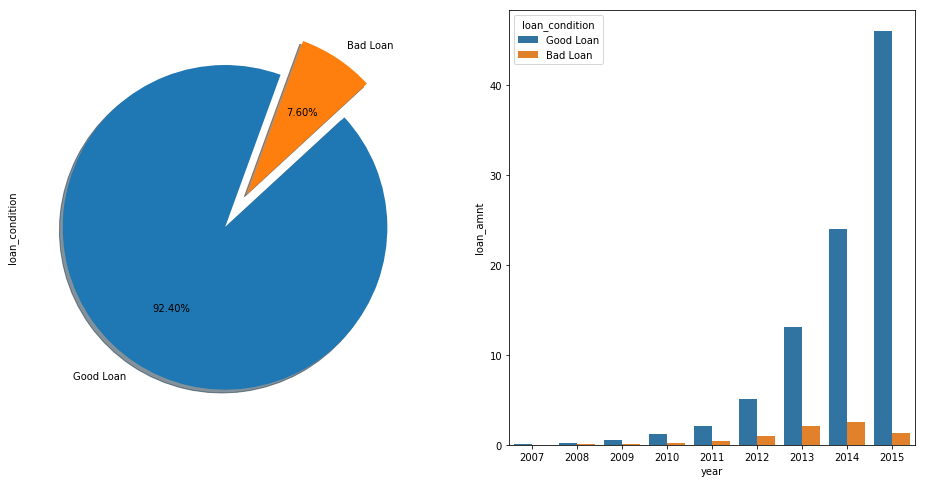

In [31]:
plt.figure(figsize=(16,8))
plt.subplot(121)
df['loan_condition'].value_counts().plot(kind = 'pie',autopct = '%.2f%%',shadow = True,
                                        startangle = 70,explode = [0,0.25])
plt.subplot(122)
sns.barplot('year','loan_amnt',hue = 'loan_condition',data = df,estimator= lambda x:
           len(x)/len(df)*100)

In [32]:
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'    
    elif state in north_east:
        return 'NorthEast'
    


df['region'] = df['addr_state'].apply(finding_regions)

In [33]:
df['complete_date'] = pd.to_datetime(df['issue_d'])

group_dates = df.groupby(['complete_date', 'region'], as_index=False).sum()


In [34]:
#取月为基本间隔
group_dates['issue_d'] = [x.to_period('M') for x in group_dates['complete_date']]

In [36]:
group_dates['loan_amnt'] = group_dates['loan_amnt']/1000
df_dates = pd.DataFrame(data = group_dates[['issue_d','region','loan_amnt']])

In [37]:
by_issued_amount = df_dates.groupby(['issue_d','region'])['loan_amnt'].sum()

In [38]:
by_issued_amount.head()

issue_d  region   
2007-06  MidWest       6.90
         NorthEast    67.70
         SouthEast    13.45
         SouthWest     1.20
         West          2.60
Name: loan_amnt, dtype: float64

In [39]:
by_issued_amount.unstack().head()# 副index转化为特征

region,MidWest,NorthEast,SouthEast,SouthWest,West
issue_d,,,,,
2007-06,6.900,67.700,13.450,1.20,2.600
2007-07,46.725,133.150,140.950,NaN,27.500
2007-08,55.950,199.675,228.925,20.75,10.000
2007-09,39.800,201.050,86.000,18.05,28.050
2007-10,84.375,300.475,314.600,18.00,35.775


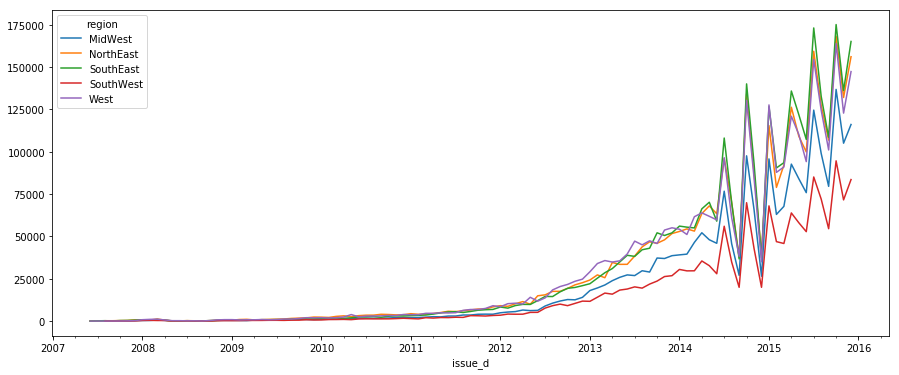

In [40]:
by_issued_amount.unstack().plot(stacked = False,legend = True,figsize = (15,6))

In [41]:
mapping_dict = {
        'emp_length':{
        '10+ years':10,
        '9 years' :9,
        '8 years' :8,
        '7 years' :7,
        '6 years' :6,
        '5 years' :5,
        '4 years' :4,
        '3 years' :3,
        '2 years' :2,
        '1 year' :1,
        '< 1 year':0,
        'Unknown' :0
    }
}
df['emp_length'] = df['emp_length'].replace(mapping_dict)

In [42]:
df.groupby(['year','region']).mean().columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [43]:
by_interest_rate = df.groupby(['year','region']).int_rate.mean()

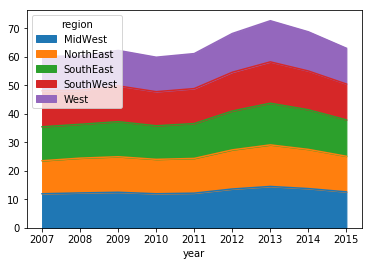

In [44]:
by_interest_rate.unstack().plot(kind = 'area')

In [45]:
badloans_df = df.loc[df['loan_condition'] == 'Bad Loan',:]

In [46]:
loan_status_cross = pd.crosstab(badloans_df['region'],badloans_df['loan_status']).apply(lambda x:x/x.sum()*100)
number_of_loanstatus = pd.crosstab(badloans_df['region'],badloans_df['loan_status'])

In [47]:
#四舍五入
loan_status_cross['Charged Off'] = loan_status_cross['Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['Default'] = loan_status_cross['Default'].apply(lambda x: round(x, 2))
loan_status_cross['Does not meet the credit policy. Status:Charged Off'] = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['In Grace Period'] = loan_status_cross['In Grace Period'].apply(lambda x: round(x, 2))
loan_status_cross['Late (16-30 days)'] = loan_status_cross['Late (16-30 days)'].apply(lambda x: round(x, 2))
loan_status_cross['Late (31-120 days)'] = loan_status_cross['Late (31-120 days)'].apply(lambda x: round(x, 2))

In [48]:
number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis = 1)
number_of_loanstatus

loan_status,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,In Grace Period,Late (16-30 days),Late (31-120 days),Total
region,,,,,,,
MidWest,7361,175,142,926,354,1820,10778
NorthEast,10671,263,190,1625,585,2799,16133
SouthEast,11094,297,184,1579,600,2925,16679
SouthWest,4774,166,79,708,273,1407,7407
West,11348,318,166,1415,545,2640,16432


In [49]:
charged_off = loan_status_cross['Charged Off'].values.tolist()
default = loan_status_cross['Default'].values.tolist()
not_meet_credit = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].values.tolist()
grace_period = loan_status_cross['In Grace Period'].values.tolist()
short_pay = loan_status_cross['Late (16-30 days)'] .values.tolist()
long_pay = loan_status_cross['Late (31-120 days)'].values.tolist()

## plotly bar图

In [50]:
charged = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= charged_off,
    name='Charged Off',
    marker=dict(
        color='rgb(192, 148, 246)'
    ),
    text = '%'
)
defaults = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y=default,
    name='Defaults',
    marker=dict(
        color='rgb(176, 26, 26)'
    ),
    text = '%'
)

credit_policy = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= not_meet_credit,
    name='Does not meet Credit Policy',
    marker = dict(
        color='rgb(229, 121, 36)'
    ),
    text = '%'
)
grace = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= grace_period,
    name='Grace Period',
    marker = dict(
        color='rgb(147, 147, 147)'
    ),
    text = '%'
)

short_pays = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= short_pay,
    name='Late Payment (16-30 days)', 
    marker = dict(
        color='rgb(246, 157, 135)'
    ),
    text = '%'
)
long_pays = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= long_pay,
    name='Late Payment (31-120 days)',
    marker = dict(
        color = 'rgb(238, 76, 73)'
        ),
    text = '%'
)

data = [charged,defaults,credit_policy,grace,short_pays,long_pays]
layout = go.Layout(
    barmode='stack',
    title='% of Bad Loan Status by Region',
    xaxis = dict(title = 'Us Regions')
)
fig = go.Figure(data=data,layout=layout)
iplot(fig,filename = 'stacked-bar')

In [55]:
#按照地区和借款状态分组
by_loan_amount = df.groupby(['region','addr_state'], as_index=False).loan_amnt.sum()
by_interest_rate = df.groupby(['region', 'addr_state'], as_index=False).int_rate.mean()
by_income = df.groupby(['region', 'addr_state'], as_index=False).annual_inc.mean()

In [57]:
states = by_loan_amount['addr_state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amnt'].values.tolist()
average_interest_rates = by_interest_rate['int_rate'].values.tolist()
average_annual_income = by_income['annual_inc'].values.tolist()

In [58]:
#建立有序的字典
from collections import OrderedDict
metrics_data = OrderedDict([('state_codes',states),
                           ('issued_loans',average_loan_amounts),
                           ('interest_rate',average_interest_rates),
                           ('annual_income',average_annual_income)])

metrics_df = pd.DataFrame(metrics_data)
metrics_df = metrics_df.round(decimals = 2)
metrics_df.head()

,state_codes,issued_loans,interest_rate,annual_income
0,IA,114075.0,12.63,44756.21
1,IL,539068450.0,13.10,76898.22
2,IN,202493900.0,13.46,67989.31
3,KS,116395875.0,13.28,68841.31
4,MI,326467800.0,13.30,69378.67


In [59]:
for col in metrics_df.columns:
    metrics_df[col] = metrics_df[col].astype(str)
    
scl = [[0.0, 'rgb(210, 241, 198)'],[0.2, 'rgb(188, 236, 169)'],[0.4, 'rgb(171, 235, 145)'],\
            [0.6, 'rgb(140, 227, 105)'],[0.8, 'rgb(105, 201, 67)'],[1.0, 'rgb(59, 159, 19)']]

metrics_df['text'] = metrics_df['state_codes'] + '<br>' +\
'Average loan interest rate: ' + metrics_df['interest_rate'] + '<br>'+\
'Average annual income: ' + metrics_df['annual_income'] 

## plotly  colorpleth

In [60]:
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = metrics_df['state_codes'],
        z = metrics_df['issued_loans'], 
        locationmode = 'USA-states',
        text = metrics_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]

layout = dict(
    title = 'Lending Clubs Issued Loans <br> (A Perspective for the Business Operations)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')



## seaborn 小提琴图  箱线图

In [80]:
pd.set_option('display.max_columns',None)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



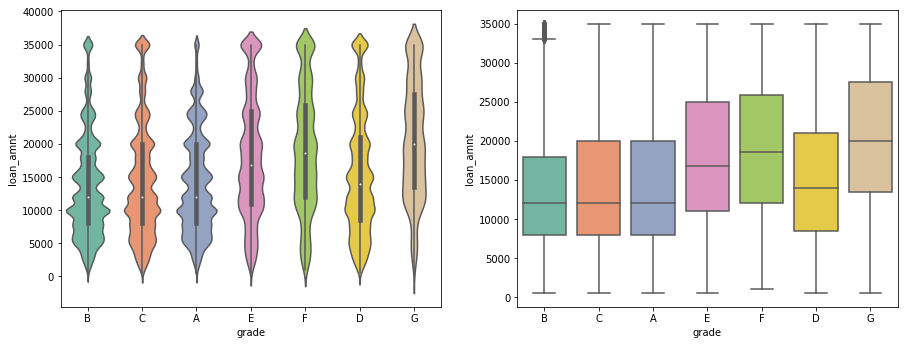

In [75]:
plt.figure(figsize =(15,12) )
plt.subplot(221)
sns.violinplot(x =  'grade',y = 'loan_amnt',data = df,palette='Set2')
plt.subplot(222)
sns.boxplot(x = 'grade',y = 'loan_amnt',data = df,palette = 'Set2')

In [77]:
by_condition = df.groupby('addr_state')['loan_condition'].value_counts()/df.groupby('addr_state')['loan_condition'].count()

## 折线图

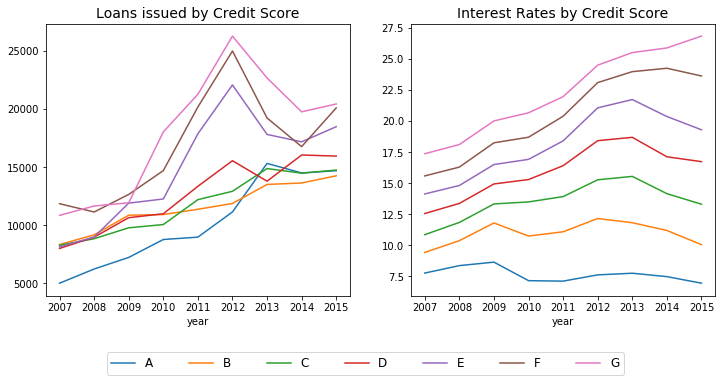

In [96]:
plt.figure(figsize=(12,5))
ax1 = plt.subplot(121)
by_credit_score = df.groupby(['year','grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False,ax = ax1)
ax1.set_title('Loans issued by Credit Score', fontsize=14)

ax2 = plt.subplot(122)
by_inc = df.groupby(['year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax = ax2)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

#将legend放在下方
ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

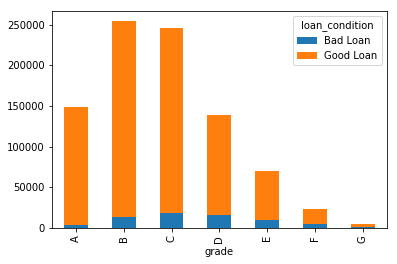

In [102]:
loans_by_region = df.groupby(['grade','loan_condition']).size()
loans_by_region.unstack().plot(kind = 'bar',stacked = True,grid = False)

## plotly  热力图

In [106]:
df_correlations = df.corr()


trace = go.Heatmap(z=df_correlations.values,
                   x=df_correlations.columns,
                   y=df_correlations.columns,
                  colorscale=[[0.0, 'rgb(165,0,38)'], 
                              [0.1111111111111111, 'rgb(215,48,39)'], 
                              [0.2222222222222222, 'rgb(244,109,67)'], 
                              [0.3333333333333333, 'rgb(253,174,97)'], 
                              [0.4444444444444444, 'rgb(254,224,144)'], 
                              [0.5555555555555556, 'rgb(224,243,248)'], 
                              [0.6666666666666666, 'rgb(171,217,233)'], 
                              [0.7777777777777778, 'rgb(116,173,209)'], 
                              [0.8888888888888888, 'rgb(69,117,180)'], 
                              [1.0, 'rgb(49,54,149)']],
                    colorbar = dict(
            title = 'Level of Correlation',
            titleside = 'top',
            tickmode = 'array',
            tickvals = [-0.52,0.2,0.95],
            ticktext = ['Negative Correlation','Low Correlation','Positive Correlation'],
            ticks = 'outside'
        )
                  )


layout = {"title": "Correlation Heatmap"}
data=[trace]

fig = dict(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap')

In [107]:
labels = bad_loan # All the elements that comprise a bad loan.

len(labels)
colors = ['rgba(236, 112, 99, 1)', 'rgba(235, 152, 78, 1)', 'rgba(52, 73, 94, 1)', 'rgba(128, 139, 150, 1)',
         'rgba(255, 87, 51, 1)', 'rgba(255, 195, 0, 1)']

mode_size = [8,8,8,8,8,8]

line_size = [2,2,2,2,2,2]

In [135]:
#准备基本数据
x_data = sorted(df['year'].unique().tolist())

charged_off = df.loc[df['loan_status'] == 'Charged Off','loan_amnt'].values.tolist()
defaults = df.loc[df['loan_status'] == 'Default','loan_amnt'].values.tolist()
not_credit_policy = df.loc[df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off',['loan_amnt']].values.tolist()
grace_period = df.loc[df['loan_status'] == 'In Grace Period','loan_amnt'].values.tolist()
short_late = df.loc[df['loan_status'] == 'Late (16-30 days)','loan_amnt'].values.tolist()
long_late = df.loc[df['loan_status'] == 'Late (31-120 days)','loan_amnt'].values.tolist()

y_data = [
    charged_off,
    defaults,
    not_credit_policy,
    grace_period,
    short_late,
    long_late,
]
y_name = ['charged_off','defaults','not_credit_policy','grace_period',
          'short_late','long_late']

In [136]:
photo_data = []

for i in range(6):
    photo_data.append(go.Scatter(
        x = x_data,
        y = y_data[i],
        name = y_name[i],
        line = dict(
            color = colors[i],
            width = 3,
            dash = 'dash',
            
        )
    ))

layout = dict(title = 'Types of Bad Loans <br> (Amount Borrowed Throughout the Years)',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Amount Issued'),
              )

fig = dict(data=photo_data, layout=layout)

iplot(fig, filename='line-mode')

## seaborn 分组箱线图

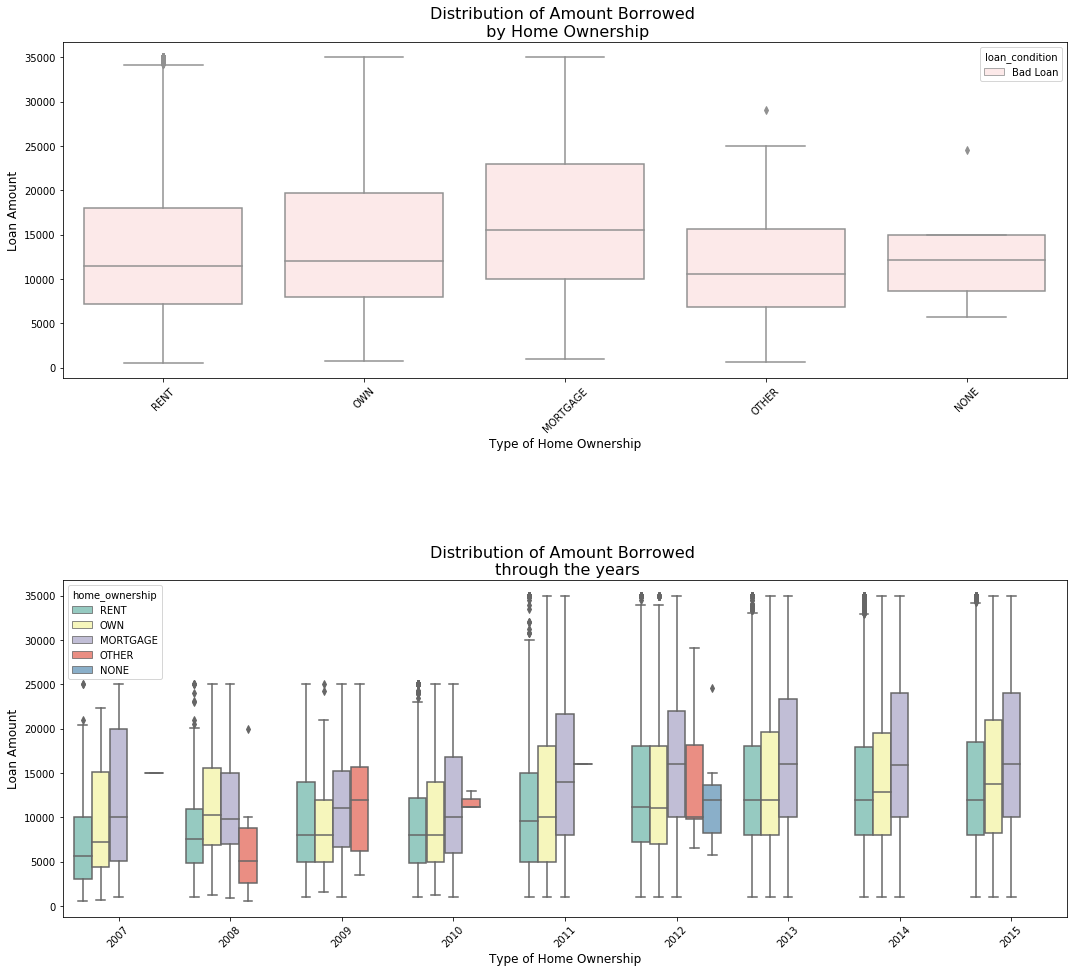

In [153]:
plt.figure(figsize=(18,18))

bad_df = df[df['loan_condition'] == 'Bad Loan']

plt.subplot(211)
ax = sns.boxplot(x = 'home_ownership',y = 'loan_amnt',hue = 'loan_condition',
                data = bad_df,color='r')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("Type of Home Ownership", fontsize=12)
ax.set_ylabel("Loan Amount", fontsize=12)
ax.set_title("Distribution of Amount Borrowed \n by Home Ownership", fontsize=16)

plt.subplot(212)
ax1 = sns.boxplot(x = 'year',y = 'loan_amnt',hue = 'home_ownership',
                 data = bad_df,palette = 'Set3')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_xlabel("Type of Home Ownership", fontsize=12)
ax1.set_ylabel("Loan Amount", fontsize=12)
ax1.set_title("Distribution of Amount Borrowed \n through the years", fontsize=16)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

In [154]:
#每个地区违约数据
northe_defaults = df['loan_amnt'].loc[(df['region'] == 'NorthEast') & (df['loan_status'] == 'Default')].values.tolist()
southw_defaults = df['loan_amnt'].loc[(df['region'] == 'SouthWest') & (df['loan_status'] == 'Default')].values.tolist()
southe_defaults = df['loan_amnt'].loc[(df['region'] == 'SouthEast') & (df['loan_status'] == 'Default')].values.tolist()
west_defaults = df['loan_amnt'].loc[(df['region'] == 'West') & (df['loan_status'] == 'Default')].values.tolist()
midw_defaults = df['loan_amnt'].loc[(df['region'] == 'MidWest') & (df['loan_status'] == 'Default')].values.tolist()

In [155]:
#各地区堆叠图累进数据
y0_stck=northe_defaults
y1_stck=[y0+y1 for y0, y1 in zip(northe_defaults, southw_defaults)]
y2_stck=[y0+y1+y2 for y0, y1, y2 in zip(northe_defaults, southw_defaults, southe_defaults)]
y3_stck=[y0+y1+y2+y3 for y0, y1, y2, y3 in zip(northe_defaults, southw_defaults, southe_defaults, west_defaults)]
y4_stck=[y0+y1+y2+y3+y4 for y0, y1, y2, y3, y4 in zip(northe_defaults, southw_defaults, southe_defaults, west_defaults, midw_defaults)] 


In [156]:
#标签txt
y0_txt=['$' + str(y0) for y0 in northe_defaults]
y1_txt=['$' + str(y1) for y1 in southw_defaults]
y2_txt=['$' + str(y2) for y2 in southe_defaults]
y3_txt=['$' + str(y3) for y3 in west_defaults]
y4_txt=['$'+ str(y4) for y4 in midw_defaults]

year = sorted(df['year'].unique().tolist())

## plotly  堆叠图

In [165]:
y_stck = [y0_stck,y1_stck,y2_stck,y3_stck,y4_stck]
y_txt = [y0_txt,y1_txt,y2_txt,y3_txt,y4_txt]
are_name = ['NE','SW','SE','W','MW']
area_data = []
for i in range(5):
    area_data.append(go.Scatter(
        x = year,
        y = y_stck[i],
        text = y_txt[i],
        hoverinfo = 'x+text',
        name = are_name[i],
        mode = 'lines',
        line = dict(width = 0.5,
                   color = colors[i]),
        fill = 'tonexty',
        
    )
    )

layout = dict(title = 'Amount Defaulted by Region',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Amount Defaulted')
             )

fig = dict(data=area_data, layout=layout)
              
iplot(fig, filename='basic-area-no-bound')


In [172]:
#以13.23为划分点将利率分为高低2类
df['interest_payments'] = np.nan
for col in [df]:
    col.loc[col['int_rate'] <= 13.23, 'interest_payments'] = 'Low'
    col.loc[col['int_rate'] > 13.23, 'interest_payments'] = 'High'
    
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,year,loan_condition,region,complete_date,interest_payments
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,Good Loan,SouthWest,2011-12-01,Low
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,Bad Loan,SouthEast,2011-12-01,High
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,Good Loan,MidWest,2011-12-01,High
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,Good Loan,West,2011-12-01,High
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,Good Loan,West,2011-12-01,Low


## seaborn    countplot条形图       distplot直方图

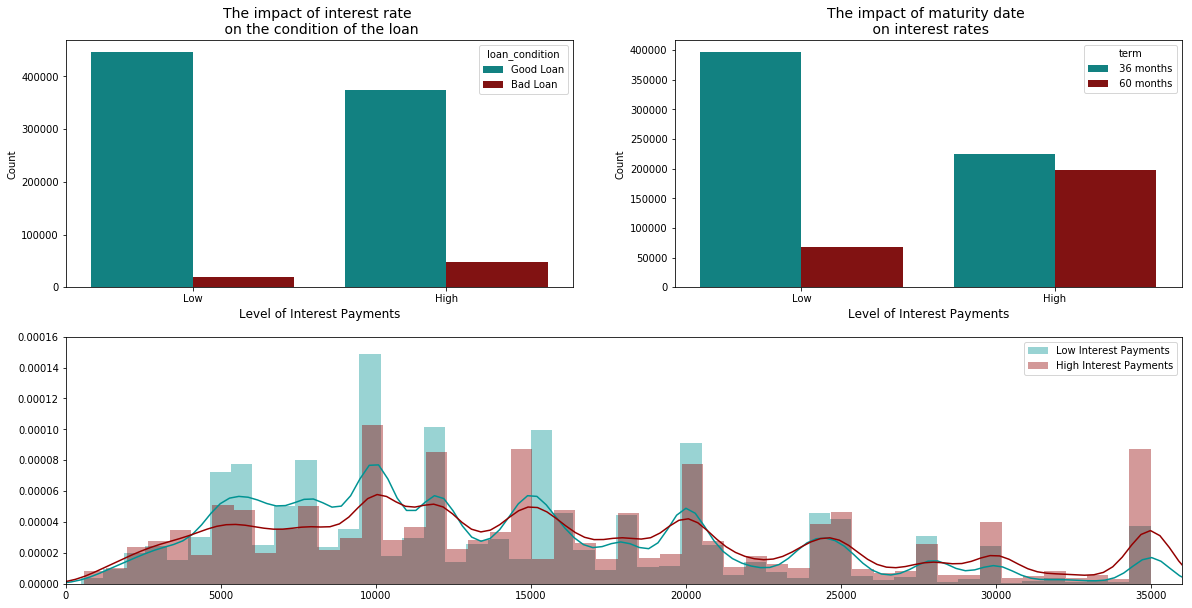

In [186]:
from scipy.stats import norm

plt.figure(figsize=(20,10))

palette = ['#009393', '#930000']

#按loan_condition 分组条形图

plt.subplot(221)
ax = sns.countplot(x='interest_payments', data=df, 
                  palette=palette, hue='loan_condition')

ax.set_title('The impact of interest rate \n on the condition of the loan', fontsize=14)
ax.set_xlabel('Level of Interest Payments', fontsize=12)
ax.set_ylabel('Count')

#按term 分组条形图
plt.subplot(222)
ax1 = sns.countplot(x='interest_payments', data=df, 
                   palette=palette, hue='term')

ax1.set_title('The impact of maturity date \n on interest rates', fontsize=14)
ax1.set_xlabel('Level of Interest Payments', fontsize=12)
ax1.set_ylabel('Count')

#同图展示low，hight借贷水平的分布
plt.subplot(212)
low = df['loan_amnt'].loc[df['interest_payments'] == 'Low'].values
high = df['loan_amnt'].loc[df['interest_payments'] == 'High'].values


ax2= sns.distplot(low, color='#009393', label='Low Interest Payments',  ) 
ax3 = sns.distplot(high, color='#930000', label='High Interest Payments', ) 

#x轴 y轴 limit设置
plt.axis([0, 36000, 0, 0.00016])
plt.legend()


plt.show()

In [188]:
df['int_rate'].loc[df['loan_status'] == 'Fully Paid']

0         10.65
2         15.96
3         13.49
5          7.90
7         18.64
10        14.65
11        12.69
13         9.91
15        16.29
16        15.27
17         6.03
18        11.71
19         6.03
20        15.27
22        11.71
23        11.71
25         9.91
28        11.71
29        11.71
30         7.51
31         7.90
33         8.90
34        15.96
35        10.65
36         9.91
37         7.90
38        12.42
40         7.51
41         7.90
42        18.25
          ...  
887069    13.66
887078    12.39
887091    19.24
887093     6.99
887121     8.67
887124    10.49
887127    13.66
887128    11.99
887144     8.19
887158    13.66
887159    25.83
887164     6.49
887178    23.99
887185    15.99
887187    12.39
887189    14.99
887194    14.31
887198    14.99
887202    11.99
887215    17.14
887249    21.99
887263    12.39
887264    12.99
887279    16.49
887332    12.39
887346    10.49
887347    15.99
887364     6.03
887366    16.49
887369     8.67
Name: int_rate, Length: 

In [190]:
#good loan  interest_rate
avg_fully_paid = round(np.mean(df.loc[df['loan_status'] == 'Fully Paid','int_rate'].values), 2)
avg_current = round(np.mean(df.loc[df['loan_status'] == 'Current','int_rate'].values), 2) 
avg_issued = round(np.mean(df.loc[df['loan_status'] == 'Issued','int_rate'].values), 2)
avg_long_fully_paid = round(np.mean(df.loc[df['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid','int_rate'].values), 2)

In [192]:
#bad loan interest_rate
avg_default_rates = round(np.mean(df.loc[df['loan_status'] == 'Default','int_rate'].values), 2)
avg_charged_off = round(np.mean(df.loc[df['loan_status'] == 'Charged Off','int_rate'].values), 2)
avg_long_charged_off = round(np.mean(df.loc[df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off','int_rate'].values), 2)
avg_grace_period = round(np.mean(df.loc[df['loan_status'] == 'In Grace Period','int_rate'].values), 2)
avg_short_late = round(np.mean(df.loc[df['loan_status'] == 'Late (16-30 days)','int_rate'].values), 2)
avg_long_late = round(np.mean(df.loc[df['loan_status'] == 'Late (31-120 days)','int_rate'].values), 2)

## plotly 雷达图

In [194]:
data = [
    go.Scatterpolar(
        mode = 'lines + markers',
        r = [avg_fully_paid,avg_current,avg_issued,avg_long_fully_paid],
        theta = ['Fully Paid','Current','Issued','NO C.P.Fully Paid'],
        fill = 'toself',
        name = 'Good Loans',
        line = dict(
            color = '#63AF63'
        ),
        marker = dict(
            color = '#B3FFB3',
            symbol = 'square',
            size = 8,
        ),
        subplot='polar',
    ),
    
    
    go.Scatterpolar(
        mode='lines+markers',
      r = [avg_default_rates, avg_charged_off, avg_long_charged_off, avg_grace_period, avg_short_late, avg_long_late],
      theta = ['Default Rate', 'Charged Off', 'C.P. Charged Off', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)'],
      fill = 'toself',
      name = 'Bad Loans',
        line = dict(
        color = "#C31414"
      ),
      marker = dict(
        color = "#FF5050",
        symbol = "square",
        size = 8
      ),
      subplot = "polar2"
    )
]

layout = go.Layout(
    title="Average Interest Rates <br> Loan Status Distribution",
    showlegend = False,
     paper_bgcolor = "rgb(255, 248, 243)",
    polar = dict(
      domain = dict(
        x = [0,0.4],
        y = [0,1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 8
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 90,
        direction = "counterclockwise"
      )
    ),
    polar2 = dict(
      domain = dict(
        x = [0.6,1],
        y = [0,1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 8
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 90,
        direction = "clockwise"
      ),
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='polar/directions')

In [195]:
purpose_condition = round(pd.crosstab(df['loan_condition'], df['purpose']).apply(lambda x: x/x.sum() * 100), 2)

In [198]:
purpose_bad_loans = purpose_condition.values[0].tolist()
purpose_godd_loans = purpose_condition.values[1].tolist()
purpose = purpose_condition.columns

## plotly 分组柱状图

In [201]:
bad_plot = go.Bar(
    x = purpose,
    y = purpose_bad_loans,
    name = 'Bad Loans',
    text = '%',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line = dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2
        )
    )
)

good_plot = go.Bar(
    x = purpose,
    y = purpose_godd_loans,
    name = 'good loans',
    text = '%',
        marker=dict(
        color='rgba(19, 64, 82, 0.7)',
        line = dict(
            color='rgba(19, 64, 82, 1.0)',
            width=2
        )
    )
)

layout = go.Layout(
    title = 'Condition of Loan by Purpose',
    xaxis = dict( title = ''),
    yaxis = dict(title = '% of the loan'),
    paper_bgcolor='#FFF8DC',
    plot_bgcolor='#FFF8DC',
    showlegend=True
)
data = [good_plot,bad_plot]

fig = dict(data = data ,layout = layout)
iplot(fig,filename='condition_purposes')